# Introduction

## Overview
The study aims to analyze the patterns, disparities, and media representation of jail deaths in the United States. Using various visualizations, including line graphs, pie charts, and bar charts, the study examines the temporal trends, demographic breakdowns, causes, and geographic distribution of jail deaths. Additionally, the study explores the common themes and narratives in media coverage of these deaths. By integrating quantitative data analysis with qualitative text analysis, the study provides a comprehensive understanding of jail deaths and their portrayal in the media.

## Research Question
The research topic explores Jail Deaths in the United States, particularly this question:
**What are the key patterns and disparities in jail deaths in the United States, and how are these deaths represented in media coverage?**

## Motivation
As someone deeply invested in technology for social good, I am motivated by the potential of this study to make a real-world impact. The issue of jail deaths is not just a statistical concern; it touches on human rights, social justice, and the need for systemic reform. By bringing to light the patterns and disparities in jail deaths, I hope to contribute to efforts aimed at protecting the most vulnerable in our society. Furthermore, examining media coverage of these deaths can help ensure that public discourse is informed by accurate data, leading to more compassionate and effective policies.

## Sources
* All the data visualizations come from the following [dataset](https://www.reuters.com/investigates/special-report/usa-jails-graphic/), provided by Reuters, which contains data from 523 jails spanning the years from 2008 to 2019.

# Data and Analysis
## Number of Deaths Per Year

In order to begin answering this question, it is important to explore trends in jail deaths. Using the dataset provided in sources, we can determine the number of annual deaths to help form conclusions.

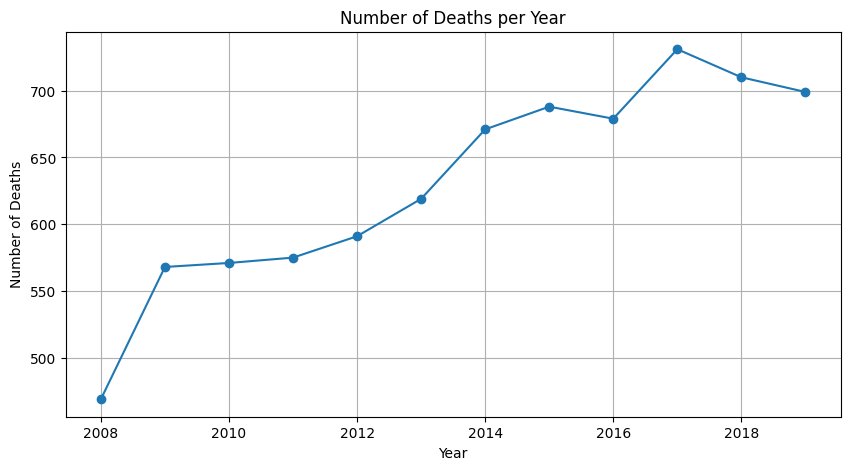

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '~/Documents/college/dgt-hum-140/jail_deaths.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths per Year')
plt.grid(True)
plt.show()

The line graph above illustrates the annual number of jail deaths in the United States from 2008 to 2019. The x-axis represents the years, while the y-axis shows the number of deaths. Each point on the line indicates the number of deaths in a specific year, and the line connects these points to show the trend over time.

The graph indicates an upward trend in the number of jail deaths from 2008 to 2018, going from 460 in 2008 to 700 in 2018, with the peak reaching 740 in 2017. This demonstrates a 52% increase in jail deaths. There was a steep increase in deaths from 2008 to 2009, followed by a more gradual increase in subsequent years.

The upward trend highlights a significant increase in jail deaths over the decade, raising concerns about the factors contributing to this rise. Keep this in mind as we explore further.

## Cause of Death
There are a lot of reasons why jail deaths may occur, and knowing what happened may help us recognize trends that are forming in relation to these deaths.

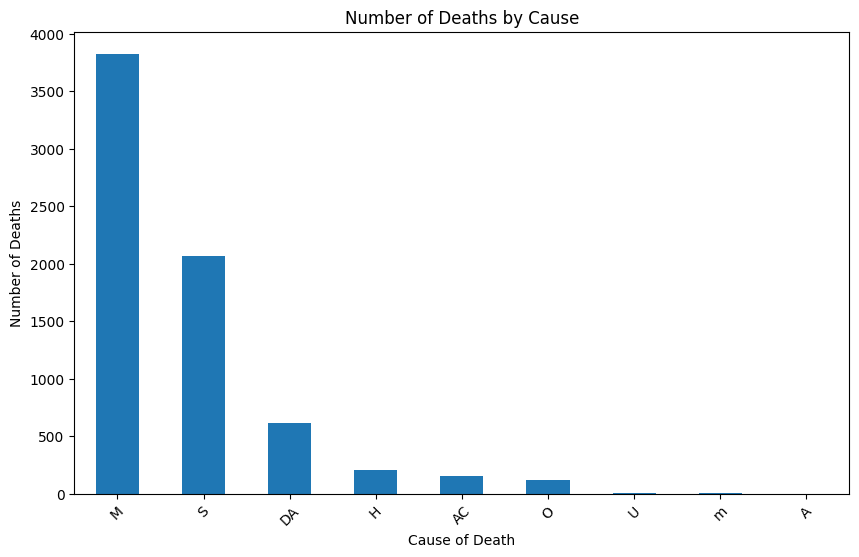

In [65]:
cause_counts = df['cause_short'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
cause_counts.plot(kind='bar')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Cause')
plt.xticks(rotation=45)
plt.show()

The bar chart shows the total number of deaths categorized by the cause of death, using the following abbreviations:
* Medical
* Suicide
* Drug or Alcohol
* Homicide
* Accident
* Cannot be determined

The leading cause of death in jails is medical, with nearly 4,000 deaths. This indicates that a significant proportion of jail deaths are related to health issues, suggesting potential gaps in medical care or pre-existing health conditions among inmates.

Suicide is the second leading cause of death, with over 2,000 deaths. This highlights mental health concerns and the potential lack of adequate mental health support and suicide prevention measures in jails.

Drug or alcohol-related deaths are also notable, suggesting substance abuse issues among the incarcerated population and the need for effective substance abuse treatment programs.

Homicides and accidents account for fewer deaths but are still significant. This points to safety and violence issues within jails. A small number of deaths are undetermined, indicating that some cases lack clear conclusions, which may warrant further investigation.

In order to delve more into the trends of increases in deaths over the years, as well as cause of death, we can combine both to visualize more similarities.

<Figure size 1200x800 with 0 Axes>

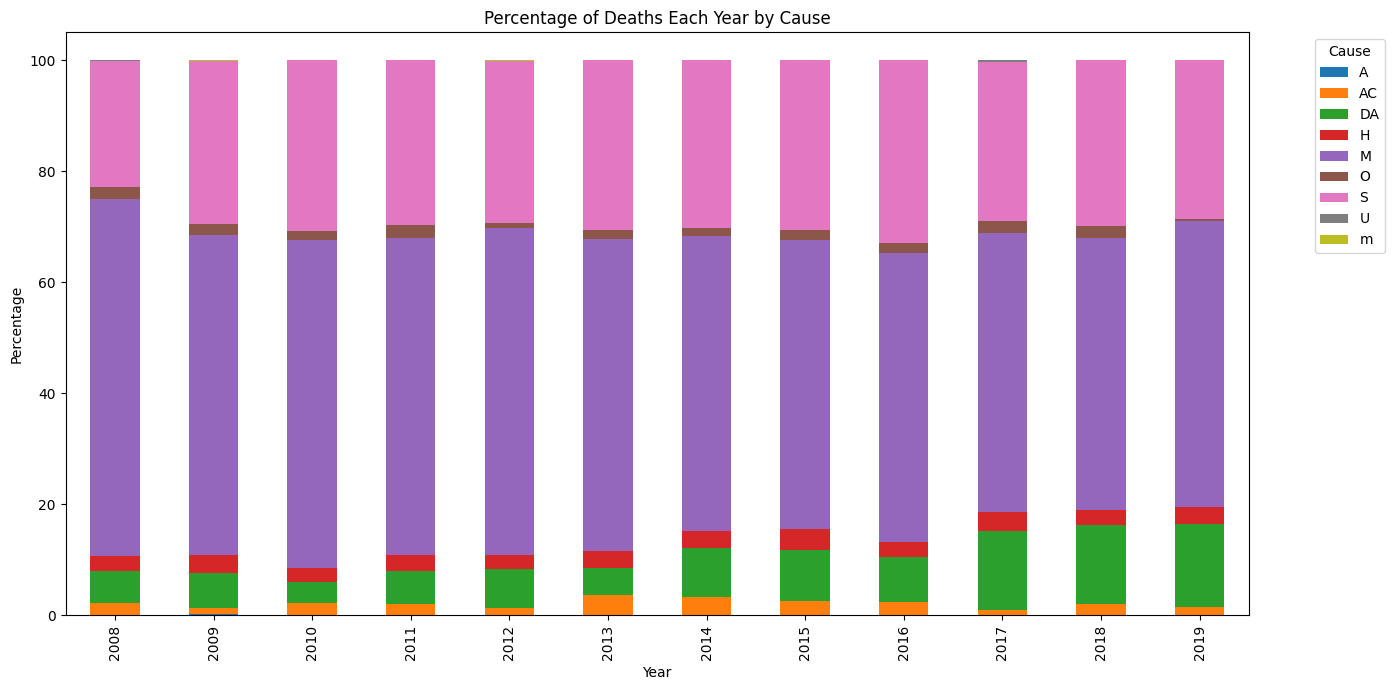

In [66]:
cause_year_counts = df.groupby(['year', 'cause_short']).size().unstack(fill_value=0)
total_deaths_per_year = cause_year_counts.sum(axis=1)
percentage_cause_year = cause_year_counts.divide(total_deaths_per_year, axis=0) * 100
plt.figure(figsize=(12, 8))
percentage_cause_year.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Percentage of Deaths Each Year by Cause')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This stacked bar chart displays the percentage distribution of deaths each year by cause. The years span from 2008 to 2019, and each bar is segmented by the proportion of deaths attributed to each cause.

Over the years, medical causes (M) consistently dominate the causes of death, though the percentage fluctuates and it is slightly decreasing over the years. Suicides (S) have a noticeable presence each year, with some variation in their proportion of total deaths. In more recent years, there appears to be a slight increase in deaths by drug and alcohol.

The analysis of these charts in relation to the research question reveals significant patterns and disparities in the causes of jail deaths in the United States. Medical issues and suicide are the predominant causes, highlighting the critical need for improved healthcare and mental health support in jails. The variability in other causes over the years suggests that external factors and policy changes may influence these deaths, warranting further investigation. Understanding these patterns can inform better policy-making and targeted interventions to reduce jail deaths and improve inmate welfare.

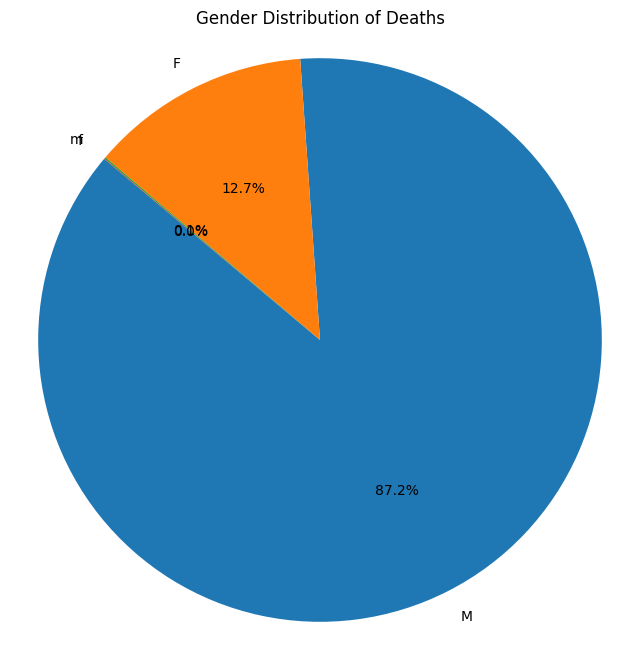

In [67]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Deaths')
plt.axis('equal')
plt.show()

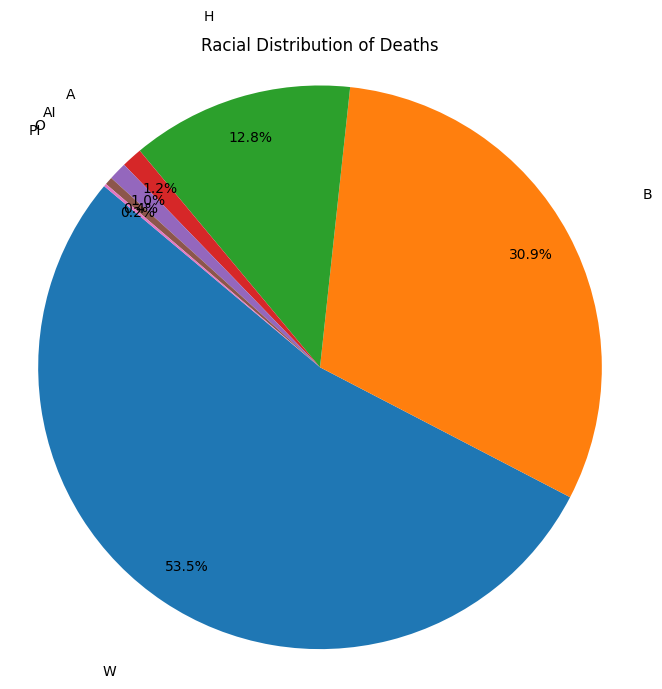

In [68]:
racial_counts = df['race'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    racial_counts,
    labels=racial_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    labeldistance=1.3
)
plt.title('Racial Distribution of Deaths')
plt.axis('equal')
plt.show()

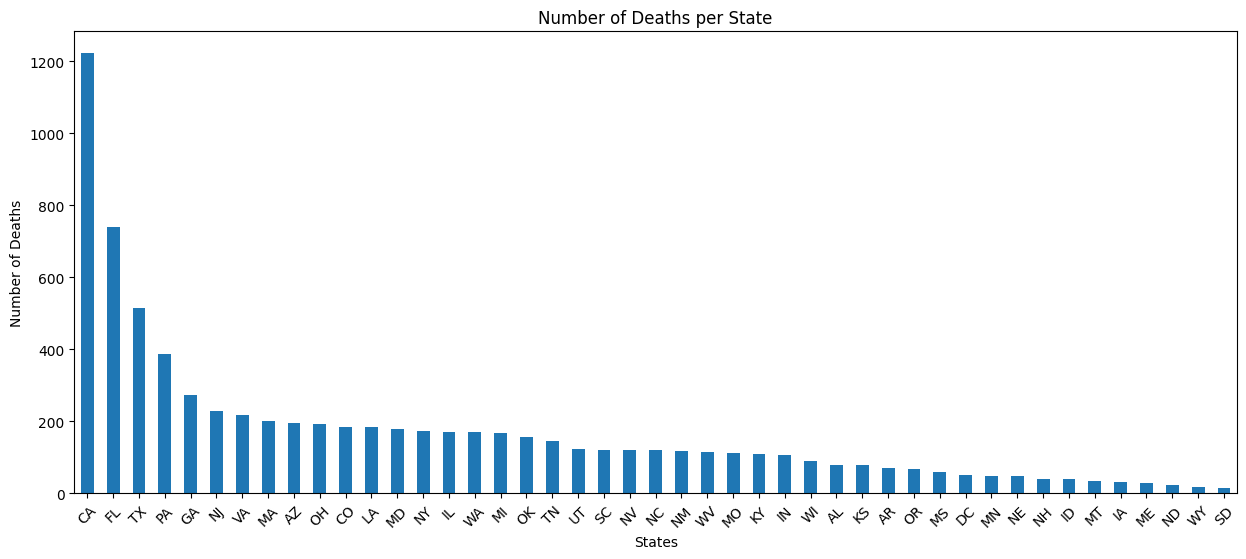

In [69]:
state_counts = df['state'].value_counts().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(15, 6))
state_counts.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths per State')
plt.xticks(rotation=45)
plt.show()

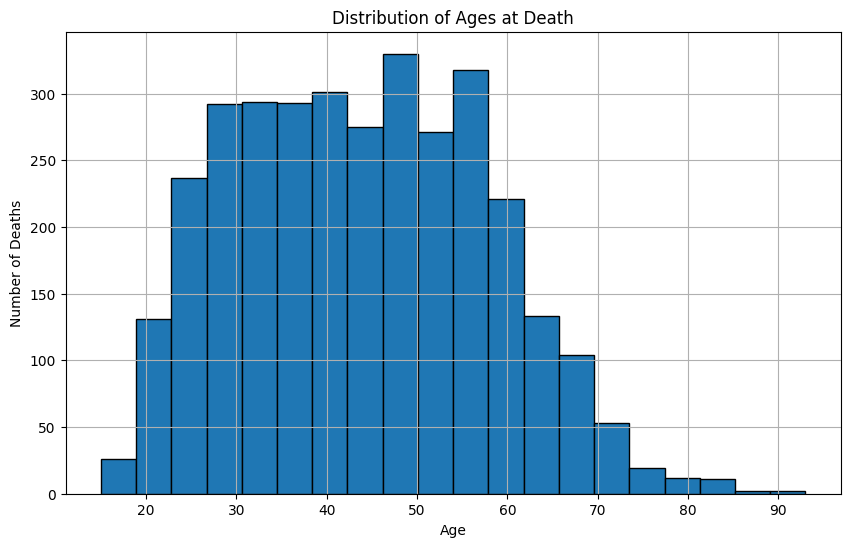

In [70]:
df = df.dropna(subset=['age'])

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age'])

plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.title('Distribution of Ages at Death')
plt.grid(True)
plt.show()

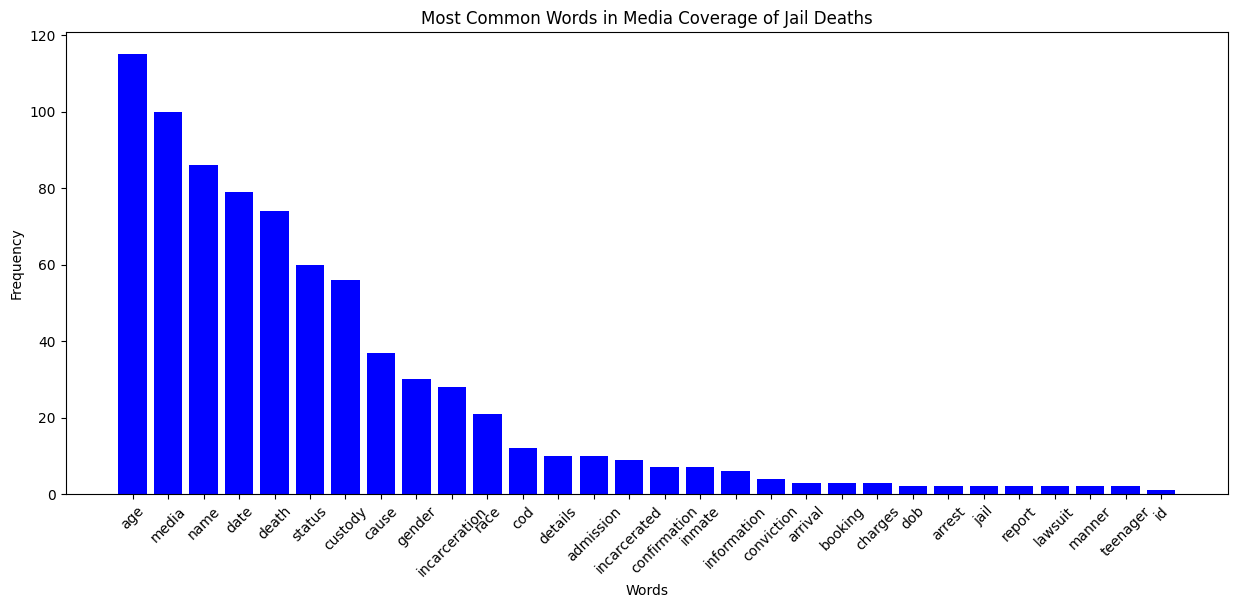

In [71]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

df = df.dropna(subset=['what_info_from_media'])

def clean_tokenize(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return tokens

df['tokens'] = df['what_info_from_media'].apply(clean_tokenize)

all_words = [word for tokens in df['tokens'] for word in tokens]
freq_dist = FreqDist(all_words)

freq_df = pd.DataFrame(freq_dist.most_common(30), columns=['Word', 'Frequency'])

plt.figure(figsize=(15, 6))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Media Coverage of Jail Deaths')
plt.xticks(rotation=45)
plt.show()